In [1]:
import cv2
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten

In [2]:
image_directory='datasets/'
no_tumor_images=os.listdir(image_directory+'no/')
yes_tumor_images=os.listdir(image_directory+'yes/')
no_tumor_images
dataset=[]
label=[]
print(len(no_tumor_images))
print(len(yes_tumor_images))

98
155


In [4]:
for i,image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((64,64))
        dataset.append(np.array(image).flatten())
        label.append(0)

In [5]:
for i,image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((64,64))
        dataset.append(np.array(image).flatten())
        label.append(1)

In [6]:
dataset=np.array(dataset)
label=np.array(label)
print(dataset.shape)
print(label.shape)

(256, 12288)
(256,)


In [7]:
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=0.2,shuffle=True)

In [8]:
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.8269230769230769


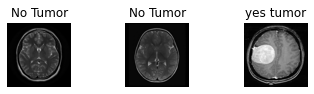

In [18]:
import matplotlib.pyplot as plt
dir1=os.listdir('test/')
c=1
for i in os.listdir('test/'):
    test=[]
    plt.subplot(3,3,c)
    image=cv2.imread('test/'+i)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    test.append(np.array(image).flatten())
    test=np.array(test)
    pred=model.predict(test)
    # plt.title(dict[i])
    if(pred==0):
        plt.title('No Tumor')
    elif(pred==1):
        plt.title("yes tumor")
    else:
        plt.title("irrelevant")
    c+=1
    plt.imshow(image,cmap='gray')
    plt.axis('off')